In [1]:
from itertools import cycle
import numpy as np

nBricksX = 50
nBricksY = 50

#Brick Dimensions
BrickWidth = 0.2
BrickHeight = 0.1
BrickDepth = 0.1

#Mortar Dimensions
MortarThickness = 0.01

#Element Sizing
nEleBrickX = 2
nEleBrickY = 1
nEleBrickZ = 1



In [2]:
"""Not checked, need to find proper values and references"""

K_brick = 10.0 * 1e9         # Bulk modulus in Pa
G_brick = 4.0 * 1e9          # Shear modulus in Pa
sigmaY_brick = 10.0 * 1e6     # Yield stress in Pa
rho_brick = 0.6              # Frictional strength parameter (dimensionless)
rhoBar_brick = 0.4           # Controls evolution of plastic volume change (dimensionless)
Kinf_brick = 0   # Nonlinear isotropic strain hardening parameter in Pa
Ko_brick = 0               # Nonlinear isotropic strain hardening parameter in Pa
delta1_brick = 0         # Nonlinear isotropic strain hardening parameter (dimensionless)
delta2_brick = 0        # Tension softening parameter (dimensionless)
H_brick = 0              # Linear hardening parameter in Pa
theta_brick = 1.0          # Controls relative proportions of isotropic and kinematic hardening (dimensionless)
density_brick = 1800.0       # Mass density of the material in kg/m³
atmPressure_brick = 101.3 * 1e3 # Atmospheric pressure in Pa

# Mortar material parameters (lower limits)
K_mortar = 5.0 * 1e9         # Bulk modulus in Pa
G_mortar = 2.0 * 1e9         # Shear modulus in Pa
sigmaY_mortar = 10.0 * 1e6    # Yield stress in Pa
rho_mortar = 0.6             # Frictional strength parameter (dimensionless)
rhoBar_mortar = 0.4          # Controls evolution of plastic volume change (dimensionless)
Kinf_mortar = 0     # Nonlinear isotropic strain hardening parameter in Pa
Ko_mortar = 0       # Nonlinear isotropic strain hardening parameter in Pa
delta1_mortar = 0        # Nonlinear isotropic strain hardening parameter (dimensionless)
delta2_mortar = 0       # Tension softening parameter (dimensionless)
H_mortar = 0     # Linear hardening parameter in Pa
theta_mortar = 1.0         # Controls relative proportions of isotropic and kinematic hardening (dimensionless)
density_mortar = 1800.0      # Mass density of the material in kg/m³
atmPressure_mortar = 101.3 * 1e3 # Atmospheric pressure in Pa

In [3]:
LayerSpacingXa = np.append(np.repeat([BrickWidth/nEleBrickX],nEleBrickX), MortarThickness)

if np.mod(nEleBrickX,2) != 0:
    endBrick = np.copy(LayerSpacingXa[0:int(nEleBrickX/2+1)])
    endBrick[-1] = endBrick[-1]/2
else:
    endBrick = LayerSpacingXa[0:int(nEleBrickX/2)]
    
layerA = np.append([0], np.cumsum(np.append(np.tile(LayerSpacingXa, nBricksX-1), endBrick)))
layerB = np.append([0], np.cumsum(np.flip(np.append(np.tile(LayerSpacingXa, nBricksX-1), endBrick))))


In [4]:
wall = []
whatLayer = cycle(np.repeat([0,1],nEleBrickY+1))
for i in range(nBricksY*(nEleBrickY+1)):
    j = next(whatLayer)
    wall.append([layerA, layerB][j])
    
wall=np.array(wall)

In [5]:
wallX = np.array(wall).flatten().reshape(-1,wall.shape[1])
wallY = np.append(np.repeat(BrickHeight/nEleBrickY,nEleBrickY), MortarThickness)
wallY = np.append(np.tile(wallY, nBricksY-1), wallY[0:-1])
wallY = np.append([0], np.cumsum(wallY))
#wallX.shape
wallY = np.repeat(wallY,wallX.shape[1]).reshape(-1,wallX.shape[1])

In [6]:
wallZ = np.zeros(shape=wallY.shape)

In [7]:
# strain = np.random.uniform(0,0.05,size=wallX.shape)

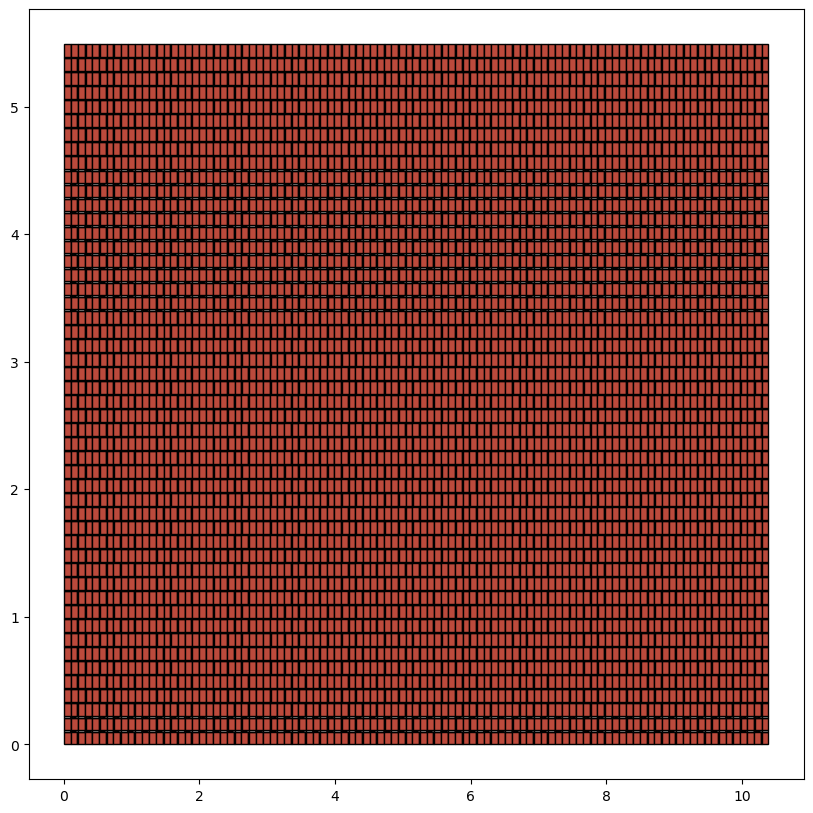

In [8]:
import matplotlib.pyplot as plt
colorA = ['#BC4A3C']*nEleBrickX+['lightgrey']
matA = ['Brick']*nEleBrickX+['Mortar']
if np.mod(nEleBrickX,2) == 0:  
    colorB = ['#BC4A3C']*int(nEleBrickX/2)+['lightgrey']+['#BC4A3C']*int(nEleBrickX/2)
    matB = ['Brick']*int(nEleBrickX/2)+['Mortar']+['Brick']*int(nEleBrickX/2)
else:
    colorB = ['#BC4A3C']*int(nEleBrickX/2+1)+['lightgrey']+['#BC4A3C']*int(nEleBrickX/2)
    matB = ['Brick']*int(nEleBrickX/2+1)+['Mortar']+['Brick']*int(nEleBrickX/2)
    
colors = [colorA*nEleBrickY,
          ['lightgrey'],
          colorB*nEleBrickY]

materials = [matA*nEleBrickY,
          ['Mortar'],
          matB*nEleBrickY]

coloridx=cycle(np.append(np.append(np.append(np.repeat([0],nEleBrickY),[1]),np.repeat([2],nEleBrickY)),[1]))

fig, ax = plt.subplots(1,1,figsize=(10,10))

matArray = np.empty(shape=(wallX.shape[0]-1, wallX.shape[1]-1), dtype=object)

for i,j in np.ndindex(wallX.shape[0]-1, wallX.shape[1]-1):
    
    if j == 0:
        c = next(coloridx)
               
        colorIter = cycle(colors[c])
        matIter = cycle(materials[c])
    
    
    px = np.array([wallX[i,j], wallX[i,j+1], wallX[i+1,j+1], wallX[i+1,j]])
    py = np.array([wallY[i,j], wallY[i,j+1], wallY[i+1,j+1], wallY[i+1,j]])
    
    #s = np.array([strain[i,j], strain[i,j+1], strain[i+1,j+1], strain[i+1,j]])
    
    
    matArray[i,j] = str(next(matIter))
    #print(i,j, matArray[i,j])
    
    
    #ax.contourf(px.reshape(2,2),py.reshape(2,2),s.reshape(2,2))
    ax.fill(px,py, next(colorIter),edgecolor='k',alpha=1)
    #ax.scatter(wallX.flatten(), wallY.flatten())
    
plt.axis('equal')

In [9]:
wallLayer = np.moveaxis(np.stack([wallX, wallY, wallZ]),0,2)
wallLayer = np.expand_dims(wallLayer,2)
wallLayer = np.repeat(wallLayer, nEleBrickZ+1, axis = 2)
for z in range(nEleBrickZ):
    wallLayer[:,:,z+1,2] = wallLayer[:,:,z,2] + BrickDepth/nEleBrickZ

In [10]:
matArray = np.repeat(np.expand_dims(matArray,2),nEleBrickZ, axis=2)

In [11]:
nodeCoords = wallLayer

nodeArray = np.empty(shape=(nodeCoords.shape[0:3]), dtype=int)
eleArray = np.empty(shape=(matArray.shape), dtype=int)

for i,j,k in np.ndindex(nodeArray.shape):
    nodeArray[i,j,k] = int(np.ravel_multi_index((i,j,k), nodeArray.shape, order='C') + 1)
    
for i,j,k in np.ndindex(matArray.shape):
    eleArray[i,j,k] = int(np.ravel_multi_index((i,j,k), matArray.shape, order='C') + 1)

In [12]:
import openseespy.opensees as ops
import opsvis as opsv

ops.wipe()
ops.model('Basic', '-ndm', 3, '-ndf', 3)

In [13]:
for i,j,k in np.ndindex(nodeArray.shape):
    ops.node(int(nodeArray[i,j,k]), *nodeCoords[i,j,k])

In [14]:
matTag = {'Brick':1, 'Mortar':2}

# ops.nDMaterial('DruckerPrager', 1, K_brick, G_brick, sigmaY_brick, rho_brick, rhoBar_brick, Kinf_brick, Ko_brick, delta1_brick,
#                delta2_brick, H_brick, theta_brick, density_brick, atmPressure_brick)
# ops.nDMaterial('DruckerPrager', 2, K_mortar, G_mortar, sigmaY_mortar, rho_mortar, rhoBar_mortar, Kinf_mortar, Ko_mortar, delta1_mortar,
#                delta2_mortar, H_mortar, theta_mortar, density_mortar, atmPressure_mortar)


#these seem to work
ops.nDMaterial('J2Plasticity', 1, 20E9,15E6,15E6,15E6,0.1,0.1)
ops.nDMaterial('J2Plasticity', 2, 5E9, 10E6, 10E6, 10E6,0.1,0.1)


# ops.nDMaterial('ElasticIsotropic', 1, 20E9, 0.3, 1800)
# ops.nDMaterial('ElasticIsotropic', 2, 20E9, 0.3, 1800)


In [15]:
for i,j,k in np.ndindex(matArray.shape):
    
    ele = (int(e) for e in [nodeArray[i,j,k], nodeArray[i,j+1,k], nodeArray[i,j+1,k+1], nodeArray[i,j,k+1],
                    nodeArray[i+1,j,k], nodeArray[i+1,j+1,k], nodeArray[i+1,j+1,k+1], nodeArray[i+1,j,k+1]])
    

    ops.element('stdBrick', int(eleArray[i,j,k]), *ele, matTag[matArray[i,j,k]])


In [16]:
#fix all four edges
xMinNodes = nodeArray[:,0,:].flatten().astype(int)
xMaxNodes = nodeArray[:,-1,:].flatten().astype(int)

yMinNodes = nodeArray[0,1:-1,:].flatten().astype(int)
yMaxNodes = nodeArray[-1,1:-1,:].flatten().astype(int)

for support in np.concatenate([xMinNodes, xMaxNodes, yMinNodes, yMaxNodes]):
    ops.fix(int(support), *[1,1,1])

In [17]:
ops.timeSeries('Linear', 1)
ops.pattern('Plain', 1, 1)

for node in ops.getNodeTags():
    ops.load(node, *[0,0,1])

In [18]:
ControlNode=int(nodeArray[int(nodeArray.shape[0]/2), int(nodeArray.shape[0]/2), 0]) #somewhere near the moddle
ControlDOF=3
MaxDisp=0.01
DispIncr=0.001
NstepsPush=int(MaxDisp/DispIncr)

# Analysis options
ops.system('BandGeneral')
ops.numberer('Plain')
ops.constraints('Plain')
#ops.test('NormDispIncr', 1.0e-4,  100 )
ops.test('FixedNumIter', 10)
ops.integrator('DisplacementControl', ControlNode, 3, DispIncr)  # Control top node in Y direction with 0.01 increment
ops.algorithm('Newton')
ops.analysis('Static')


dataPush = np.zeros((NstepsPush,*nodeArray.shape[:-1]))
for j in range(NstepsPush):
    ops.analyze(1)
    #ops.recorder('Element', '-file', 'ele.out', *ops.getEleTags(), 'stresses')
    a = np.array(ops.eleResponse(1, 'strains'))
    print(j)
    
    for k,l in np.ndindex(nodeArray.shape[:-1]):
        dataPush[j,k,l] = ops.nodeDisp(int(nodeArray[k,l,0]),3)

98
98
98
98
98
98
98
98
98
98


In [19]:
maxPrincipalStrains = np.zeros(shape=eleArray.shape)

for i,j,k in np.ndindex(eleArray.shape):
    # Assuming the model is already created and the analysis is run
    # Define the element tag for which you want to find the maximum principal strain
    element_tag = int(eleArray[i,j,k])

    # Get the strain tensor at integration points
    strain_response = ops.eleResponse(element_tag, 'strains')
    num_integration_points = len(strain_response) // 6

    max_principal_strains = []

    # Loop through each integration point to calculate the principal strains
    for l in range(num_integration_points):
        # Strain tensor components for integration point i
        strain_tensor = np.array([
            [strain_response[6*l],   strain_response[6*l+3], strain_response[6*l+5]],
            [strain_response[6*l+3], strain_response[6*l+1], strain_response[6*l+4]],
            [strain_response[6*l+5], strain_response[6*l+4], strain_response[6*l+2]]
        ])

        # Calculate eigenvalues (principal strains) of the strain tensor
        principal_strains = np.linalg.eigvalsh(strain_tensor)

        # Find the maximum principal strain at this integration point
        max_principal_strain = np.max(principal_strains)
        max_principal_strains.append(max_principal_strain)

    # Find the overall maximum principal strain across all integration points
    overall_max_principal_strain = np.max(max_principal_strains)
    
    maxPrincipalStrains[i,j,k] = overall_max_principal_strain

    #print(f"Maximum principal strain in the element {element_tag}: {overall_max_principal_strain}")


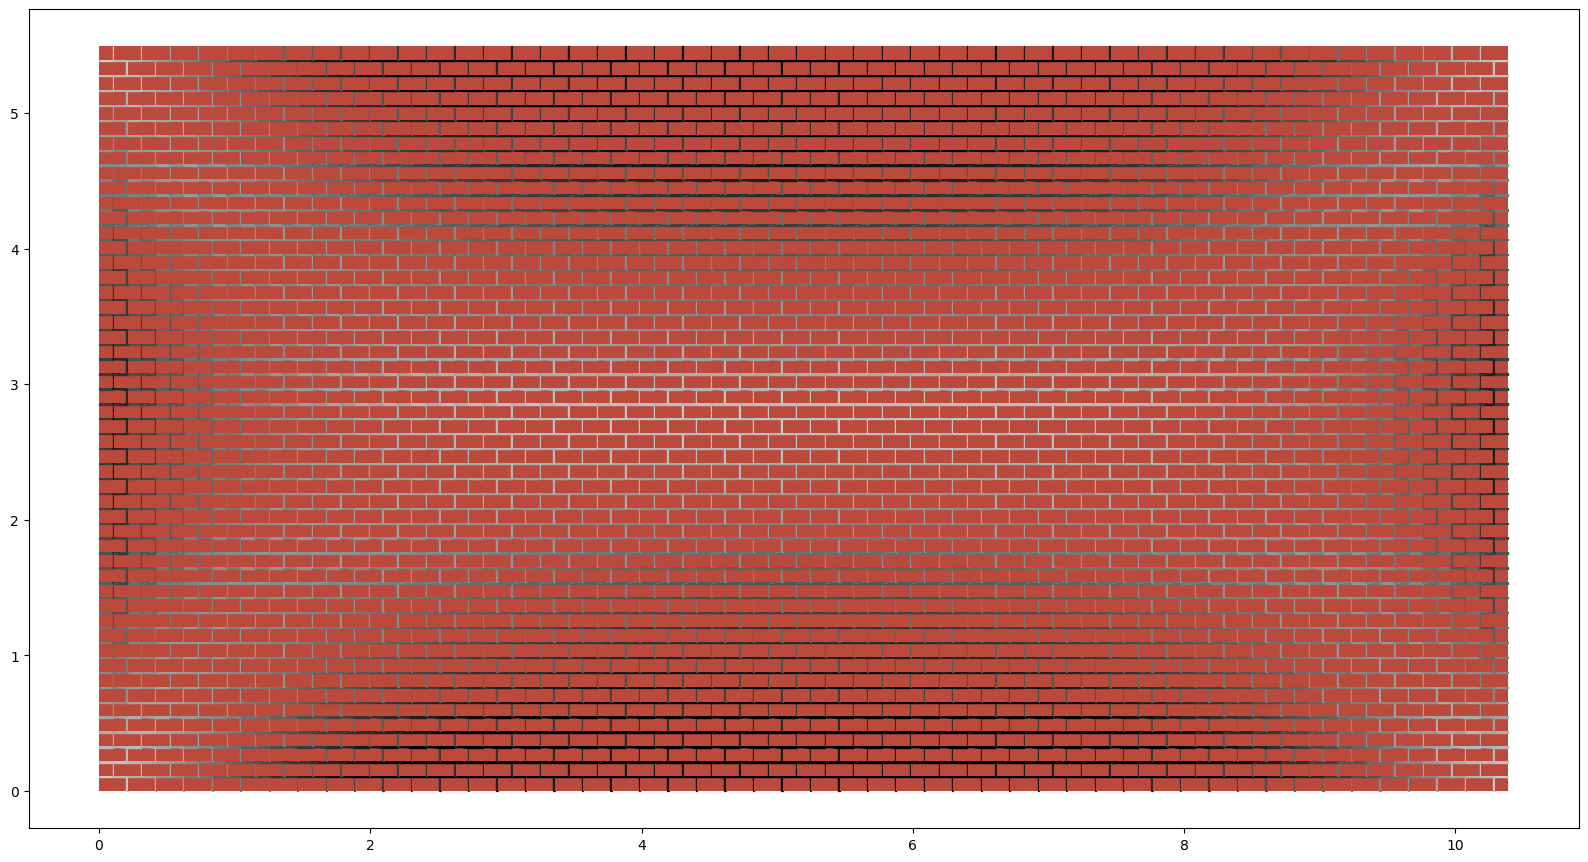

In [26]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["lightgrey", "black"])

# Create a normalizer to map values to the range [0, 1]
norm = mcolors.Normalize(vmin=0, vmax=0.005)

# Function to get color from colormap based on a value
def get_color(value, vmin=0, vmax=0.005):
    # Normalize the value to the range [0, 1]
    normalized_value = norm(value)
    # Get the color from the colormap
    return cmap(normalized_value)




colorA = ['#BC4A3C']*nEleBrickX+['lightgrey']
matA = ['Brick']*nEleBrickX+['Mortar']
if np.mod(nEleBrickX,2) == 0:  
    colorB = ['#BC4A3C']*int(nEleBrickX/2)+['lightgrey']+['#BC4A3C']*int(nEleBrickX/2)
    matB = ['Brick']*int(nEleBrickX/2)+['Mortar']+['Brick']*int(nEleBrickX/2)
else:
    colorB = ['#BC4A3C']*int(nEleBrickX/2+1)+['lightgrey']+['#BC4A3C']*int(nEleBrickX/2)
    matB = ['Brick']*int(nEleBrickX/2+1)+['Mortar']+['Brick']*int(nEleBrickX/2)
    
colors = [colorA*nEleBrickY,
          ['lightgrey'],
          colorB*nEleBrickY]

materials = [matA*nEleBrickY,
          ['Mortar'],
          matB*nEleBrickY]

coloridx=cycle(np.append(np.append(np.append(np.repeat([0],nEleBrickY),[1]),np.repeat([2],nEleBrickY)),[1]))

fig, ax = plt.subplots(1,1,figsize=(20,20))

matArray = np.empty(shape=(wallX.shape[0]-1, wallX.shape[1]-1), dtype=object)

for i,j in np.ndindex(wallX.shape[0]-1, wallX.shape[1]-1):
    
    if j == 0:
        c = next(coloridx)
               
        colorIter = cycle(colors[c])
        matIter = cycle(materials[c])
    
    
    px = np.array([wallX[i,j], wallX[i,j+1], wallX[i+1,j+1], wallX[i+1,j]])
    py = np.array([wallY[i,j], wallY[i,j+1], wallY[i+1,j+1], wallY[i+1,j]])
    
    #s = np.array([strain[i,j], strain[i,j+1], strain[i+1,j+1], strain[i+1,j]])
    
    
    matArray[i,j] = str(next(matIter))
    #print(i,j, matArray[i,j])
    
    
    cstrain = mcolors.rgb2hex(get_color(maxPrincipalStrains[i,j,0]), keep_alpha=True)
    #print(get_color(maxPrincipalStrains[i,j]))
    
    ax.fill(px,py, next(colorIter),edgecolor=None,alpha=1)
    #ax.fill(px,py, cstrain, edgecolor=None,alpha=0.4)

    if matArray[i,j] == 'Mortar':   
        ax.fill(px,py, cstrain, edgecolor=cstrain,alpha=1)
    #ax.scatter(wallX.flatten(), wallY.flatten())
    
#ax.contourf(nodeCoords[:,:,0,0], nodeCoords[:,:,0,1], dataPush[9,:,:],alpha=0.4)
ax.set_aspect('equal')

